## Import's

In [1]:
import json
import pandas as pd

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

## Ответы на начальные вопросы:

**5 примеров применения ML (для ответа в Intro):**

1. Рекомендательные системы (YouTube, Netflix) -> польза: персонализация контента.

2. Фрод-детекция в банках -> польза: защита клиентов и снижение убытков.

3. Диагностика по медицинским изображениям -> польза: поддержка врачей, раннее выявление болезней.

4. Прогнозирование спроса (магазины, логистика) -> польза: оптимизация запасов и снижение издержек.

5. Автопилот автомобилей -> польза: повышение безопасности и комфорта.

**Классы задач:**

1. Рекомендации -> чаще всего рейтинг / классификация.

2. Фрод -> бинарная классификация.

3. Диагностика -> мультиклассовая классификация.

4. Прогноз спроса -> регрессия.

5. Автопилот -> смесь (классификация объектов + регрессия траектории).

**Multiclass vs Multilabel:**

- Multiclass — объект относится только к одному классу (пример: "high"/"medium"/"low").

- Multilabel — объект может принадлежать к нескольким классам одновременно (пример: фото с «кот» и «собака»).

**Цены квартир -> это регрессия. Но можно свести к классификации, например, разделив цену на категории (дешёвая / средняя / дорогая).**

**Размер датасета: 49 352 строк × 15 колонок.**

**Целевая переменная: price.**

**Пропусков в числовых признаках нет.**

## Считываем Json

In [78]:
df = pd.read_json('./data/train.json')
df_test = pd.read_json('./data/test.json')

## Проверяем содержимое Json'a

In [4]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [6]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [7]:
df.corr(method='pearson', min_periods=1, numeric_only=True)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


In [8]:
df.corr(method='kendall', min_periods=1, numeric_only=True)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.465026,0.015335,0.000669,-0.016513,0.457291
bedrooms,0.465026,1.000000,-0.005015,0.010312,0.047140,0.449191
latitude,0.015335,-0.005015,1.000000,0.008922,0.392989,-0.074105
listing_id,0.000669,0.010312,0.008922,1.000000,0.008808,0.009790
longitude,-0.016513,0.047140,0.392989,0.008808,1.000000,-0.240862
price,0.457291,0.449191,-0.074105,0.009790,-0.240862,1.000000


In [9]:
df.corr(method='spearman', min_periods=1, numeric_only=True)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.516155,0.019000,0.000834,-0.020879,0.557737
bedrooms,0.516155,1.000000,-0.006738,0.013914,0.063540,0.577320
latitude,0.019000,-0.006738,1.000000,0.013304,0.504674,-0.110942
listing_id,0.000834,0.013914,0.013304,1.000000,0.013186,0.014641
longitude,-0.020879,0.063540,0.504674,0.013186,1.000000,-0.355121
price,0.557737,0.577320,-0.110942,0.014641,-0.355121,1.000000


## Вытаскиваем в отельную переменную **'bathrooms', 'bedrooms', 'interest_level', 'price'** и работаем с ними

In [33]:
my_df = df[['bathrooms', 'bedrooms', 'interest_level', 'price']]

In [11]:
my_df

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


<Axes: xlabel='price', ylabel='Count'>

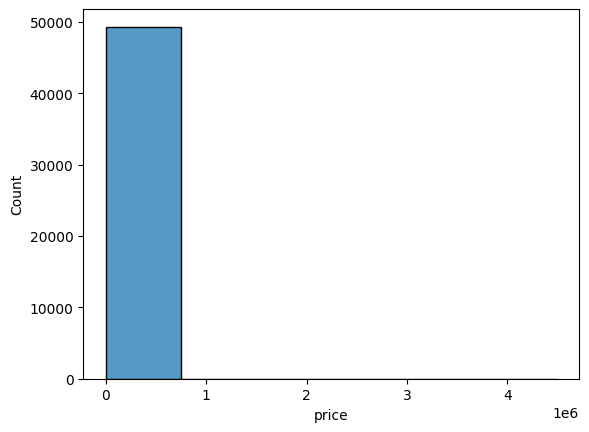

In [20]:
sns.histplot(data=my_df, x='price', bins = 6)

<Axes: xlabel='price'>

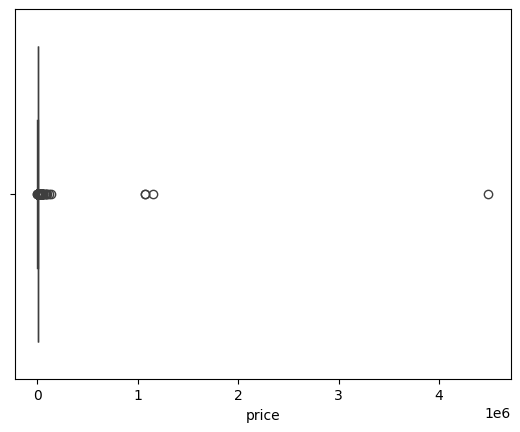

In [22]:
sns.boxplot(data=my_df, x='price')

In [34]:
q01 = my_df['price'].quantile(q=0.01)
q99 = my_df['price'].quantile(q=0.99)

quantile_my_df = my_df[(my_df['price'] > q01) & (my_df['price'] < q99)]


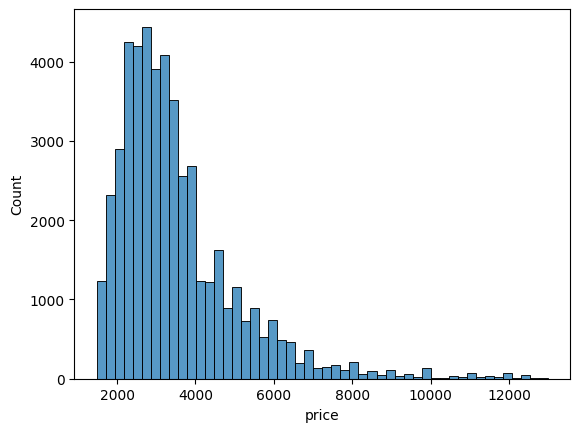

In [35]:
sns.histplot(data=quantile_my_df['price'], bins=50);

Characteristics Analysis

What is the type of column 'interest_level'? - **object**

Print the values in this column. How many entries does each value contain? - **3: 'medium', 'low', 'high'**

Encode these values. For example, you can replace each value with 0, 1, or 2.

Plot histograms for the features 'bathrooms', 'bedrooms'. Are there any outliers?


In [36]:
quantile_my_df['interest_level'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [37]:
quantile_my_df["interest_level"] = (
    quantile_my_df["interest_level"]
    .replace({"medium": 1, "low": 0, "high": 2})
    .astype(int)
)

/var/folders/5x/r11gzlss06g7534727qbgv8c0000gn/T/ipykernel_24974/678918686.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"medium": 1, "low": 0, "high": 2})
/var/folders/5x/r11gzlss06g7534727qbgv8c0000gn/T/ipykernel_24974/678918686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantile_my_df["interest_level"] = (


In [38]:
quantile_my_df['interest_level'].unique()

array([1, 0, 2])

<Axes: xlabel='bathrooms', ylabel='Count'>

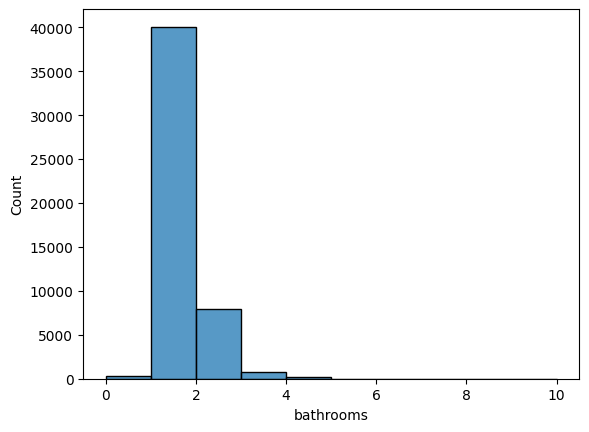

In [39]:
sns.histplot(my_df['bathrooms'], bins=10)

<Axes: xlabel='bedrooms', ylabel='Count'>

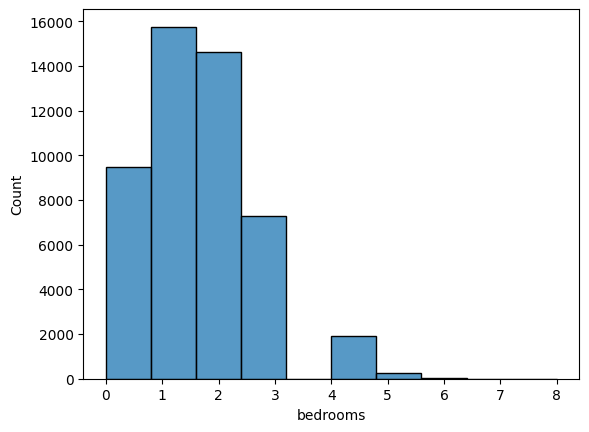

In [40]:
sns.histplot(my_df['bedrooms'], bins=10)

## Кореляционная таблица + тепловая карта

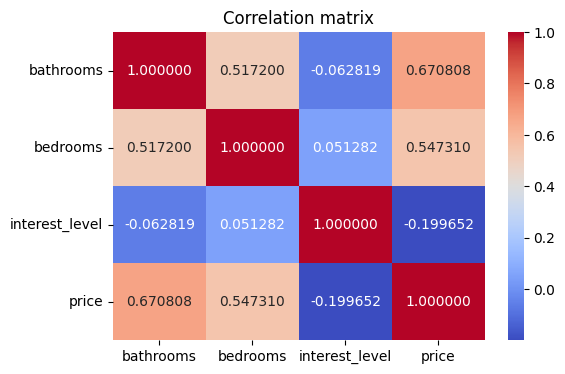

In [45]:
corr = quantile_my_df.corr(numeric_only=True)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".6f")
plt.title("Correlation matrix")
plt.show()


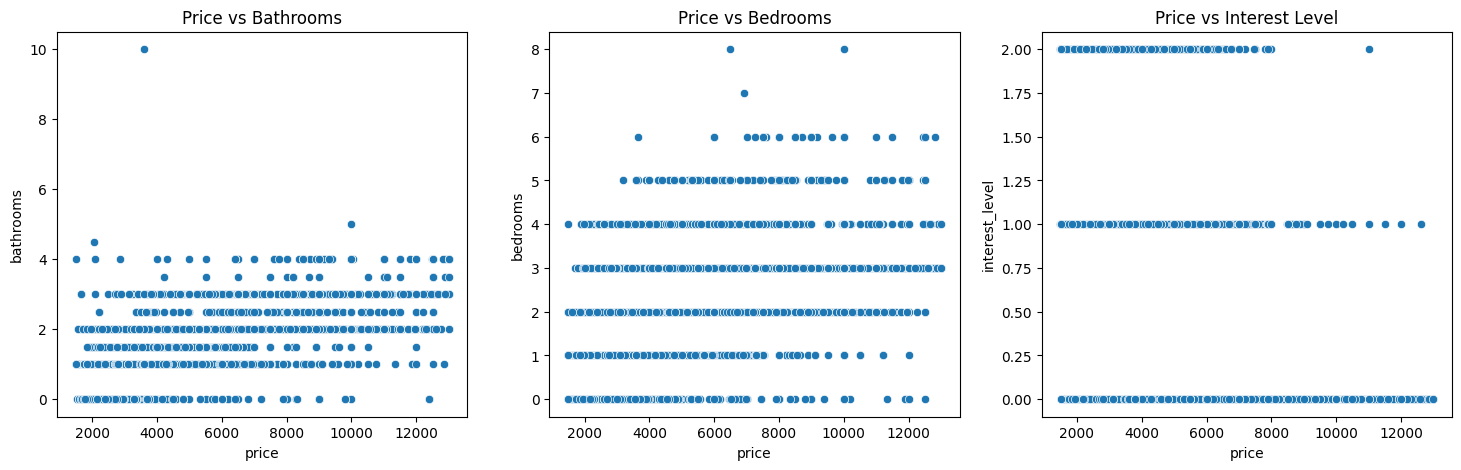

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(ax=axes[0], x=quantile_my_df["price"], y=quantile_my_df["bathrooms"])
axes[0].set_title("Price vs Bathrooms")

sns.scatterplot(ax=axes[1], x=quantile_my_df["price"], y=quantile_my_df["bedrooms"])
axes[1].set_title("Price vs Bedrooms")

sns.scatterplot(ax=axes[2], x=quantile_my_df["price"], y=quantile_my_df["interest_level"])
axes[2].set_title("Price vs Interest Level")

plt.show()


# 4. Creating Features

## PolynomialFeatures

In [57]:
poly_quant_my_df = quantile_my_df.copy()

poly_quant_my_df["bathrooms_squared"] = poly_quant_my_df["bathrooms"] ** 2
poly_quant_my_df["bedrooms_squared"] = poly_quant_my_df["bedrooms"] ** 2
poly_quant_my_df["interest_level_squared"] = poly_quant_my_df["interest_level"] ** 2


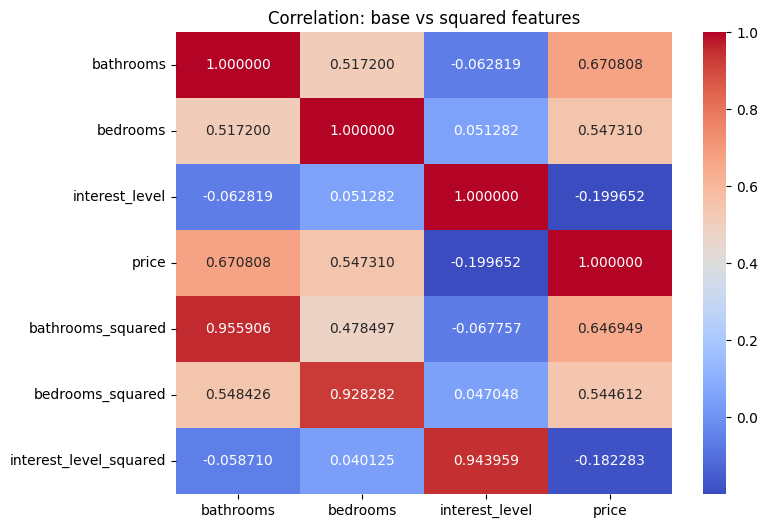

In [63]:
base_features = ["bathrooms", "bedrooms", "interest_level", "price"]
new_features = ["bathrooms_squared", "bedrooms_squared", "interest_level_squared"]

corr_full = poly_quant_my_df[base_features + new_features].corr()

corr_custom = corr_full.loc[base_features + new_features, base_features]

plt.figure(figsize=(8,6))
sns.heatmap(corr_custom, annot=True, cmap="coolwarm", fmt=".6f")
plt.title("Correlation: base vs squared features")
plt.show()


# 5. Now you need to train 3 models: linear regression, decision tree and naive model. We will use them as black boxes without deep understanding.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [80]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74659 entries, 0 to 124010
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        74659 non-null  float64
 1   bedrooms         74659 non-null  int64  
 2   building_id      74659 non-null  object 
 3   created          74659 non-null  object 
 4   description      74659 non-null  object 
 5   display_address  74659 non-null  object 
 6   features         74659 non-null  object 
 7   latitude         74659 non-null  float64
 8   listing_id       74659 non-null  int64  
 9   longitude        74659 non-null  float64
 10  manager_id       74659 non-null  object 
 11  photos           74659 non-null  object 
 12  price            74659 non-null  int64  
 13  street_address   74659 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.5+ MB


In [226]:
q_price_01, q_price_99 = df['price'].quantile([0.01, 0.99])
q_bathrooms_01, q_bathrooms_99 = df['bathrooms'].quantile([0.01, 0.99])
q_bedrooms_01, q_bedrooms_99 = df['bedrooms'].quantile([0.01, 0.99])

quantile_df = df[(df['price'] > q_price_01) & (df['price'] < q_price_99) &
   (df['bathrooms'] < q_bathrooms_99) &
    (df['bedrooms'] < q_bedrooms_99)
    ]

X_train = quantile_df[["bathrooms", "bedrooms"]]
y_train = quantile_df["price"]

X_test = df_test[["bathrooms", "bedrooms"]]
y_test = df_test["price"]

poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


## Linear Regression

In [227]:
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

y_train_pred_lr = linreg.predict(X_train_poly)
y_test_pred_lr = linreg.predict(X_test_poly)

mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))


## Decision Tree

In [228]:
tree = DecisionTreeRegressor(random_state=21)
tree.fit(X_train_poly, y_train)

y_train_pred_tree = tree.predict(X_train_poly)
y_test_pred_tree = tree.predict(X_test_poly)

mae_train_tree = mean_absolute_error(y_train, y_train_pred_tree)
mae_test_tree = mean_absolute_error(y_test, y_test_pred_tree)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))


## Naive Models (mean, median)

In [229]:
mean_price = y_train.mean()
median_price = y_train.median()

y_train_pred_mean = np.full_like(y_train, fill_value=mean_price)
y_test_pred_mean = np.full_like(y_test, fill_value=mean_price)

y_train_pred_median = np.full_like(y_train, fill_value=median_price)
y_test_pred_median = np.full_like(y_test, fill_value=median_price)

mae_train_mean = mean_absolute_error(y_train, y_train_pred_mean)
mae_test_mean = mean_absolute_error(y_test, y_test_pred_mean)
rmse_train_mean = np.sqrt(mean_squared_error(y_train, y_train_pred_mean))
rmse_test_mean = np.sqrt(mean_squared_error(y_test, y_test_pred_mean))

mae_train_median = mean_absolute_error(y_train, y_train_pred_median)
mae_test_median = mean_absolute_error(y_test, y_test_pred_median)
rmse_train_median = np.sqrt(mean_squared_error(y_train, y_train_pred_median))
rmse_test_median = np.sqrt(mean_squared_error(y_test, y_test_pred_median))


## Сводные таблицы MAE и RMSE

In [230]:
result_MAE = pd.DataFrame([
    ["linear_regression", mae_train_lr, mae_test_lr],
    ["decision_tree", mae_train_tree, mae_test_tree],
    ["naive_mean", mae_train_mean, mae_test_mean],
    ["naive_median", mae_train_median, mae_test_median]
], columns=["model", "train", "test"])

result_RMSE = pd.DataFrame([
    ["linear_regression", rmse_train_lr, rmse_test_lr],
    ["decision_tree", rmse_train_tree, rmse_test_tree],
    ["naive_mean", rmse_train_mean, rmse_test_mean],
    ["naive_median", rmse_train_median, rmse_test_median]
], columns=["model", "train", "test"])

print("=== MAE ===")
print(result_MAE)
print("\n=== RMSE ===")
print(result_RMSE)


=== MAE ===
               model       train          test
0  linear_regression  723.821501  1.474522e+17
1      decision_tree  723.821501  9.897096e+02
2         naive_mean  990.223477  1.340856e+03
3       naive_median  957.565208  1.324338e+03

=== RMSE ===
               model        train          test
0  linear_regression  1025.313243  4.028954e+19
1      decision_tree  1025.313243  9.608590e+03
2         naive_mean  1366.251818  9.720187e+03
3       naive_median  1399.194348  9.736386e+03


## Какая модель лучшая? - **Decision_Tree**